In [54]:
import pandas as pd
import numpy as np
import math as mt
from numpy import dot
from numpy.linalg import norm
from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

## Pearson Correlation Coefficient, PCC (피어슨 상관계수)
- 모수적 상관계수 : 모수를 특정 분포로 가정하여 접근하는 방법
- 공분산, 상관관계의 기반 유사도 측정 기법이다.
- 상관계수는 두 변수의 선형관계를 나타내는 지표로 쓰이는데, 이 때 상관계수가 큰 경우 거리가 짧다고 본다.
- 입력값으로 들어오는 두 변수가 정규분포를 따른 때는 최적이고, 이상치에 많이 민감하다.
#### 선형 관계 : 한 변수의 변화가 다른 변수의 변화에 비례적으로 연관되어 있는 경우에 선형관계가 있다.
---
#### 모수적, 비모수적
- 정규분포 조건에 충족하지 못하면, 비모수적 상관계수로 풀어 내곤 한다.

$$
pcc(A,B)=\\
\frac{
    \sum^n_i(A_i-\bar{A})(B_i-\bar{B})
}
{
    \sqrt{\sum^n_i(A_i-\bar{A})^2}
    \sqrt{\sum^n_i(B_i-\bar{B})^2}
}
$$

A [1 2 3 4 5 6 7 8 9]
B [ 1  3  5  7  9 11 13 15 17]
C [ -1  -3  -5  -7  -9 -11 -13 -15 -17]
D [0. 0. 0. 0. 0. 0. 0. 0. 0.]
E [0 1 2 3 4 3 2 1 0]
F [10 11 12 13 14 13 12 11 10]
F [100 200 300 400 500 600 700 800 900]
corr [[ 1.00000000e+00  1.00000000e+00 -1.00000000e+00             nan
  -2.90724631e-17  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -1.00000000e+00             nan
  -2.90724631e-17  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  1.00000000e+00             nan
   2.90724631e-17  0.00000000e+00 -1.00000000e+00]
 [            nan             nan             nan             nan
              nan             nan             nan]
 [-2.90724631e-17 -2.90724631e-17  2.90724631e-17             nan
   1.00000000e+00  1.00000000e+00  4.65159410e-18]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00             nan
   1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -1.00000000e+00             nan
   4.65159

<AxesSubplot:>

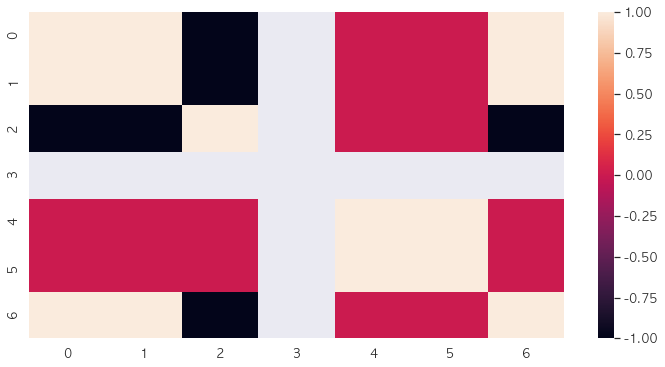

In [74]:
A = np.arange(1, 10, 1)
B = np.arange(1, 19, 2)
C = np.arange(1, 19, 2) * -1
D = np.zeros(9)
E = np.append(np.arange(0,5), np.arange(0, 4)[::-1])
F = np.append(np.arange(10,15), np.arange(10, 14)[::-1])
G = np.arange(100, 1000, 100)

print("A", A)
print("B", B)
print("C", C)
print("D", D)
print("E", E)
print("F", F)
print("F", G)
corr = np.corrcoef([A,B,C,D,E,F,G])
print("corr",  corr)

sn.heatmap(corr)

#### 무엇을 의미할까요?
- 두 벡터가 선형관계이다~ 라는 말은 다음과 같다.
- 한쪽을 X축에, 한쪽을 Y축에 값을 놓았을 때, 선형의 분포를 나타내는가?

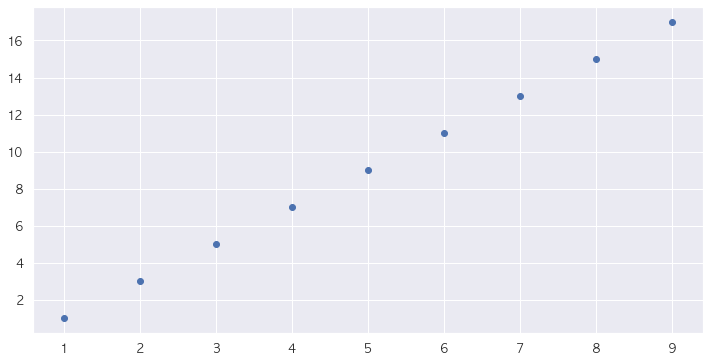

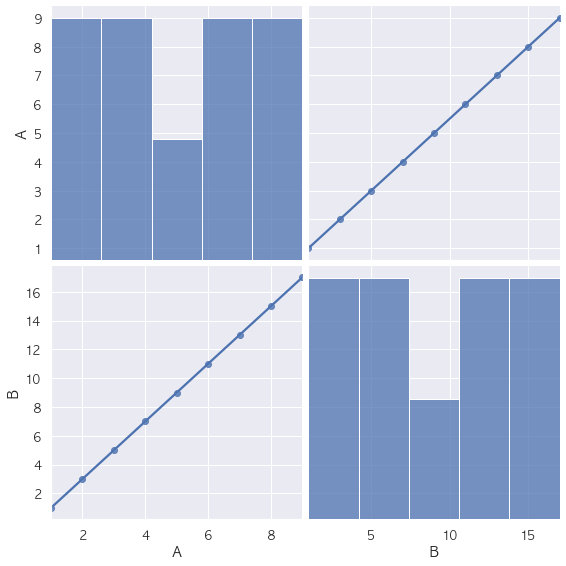

In [80]:
# 상관계수가 1인 A,B
plt.scatter(A,B)

test_A_B = pd.DataFrame()
test_A_B['A'] = A
test_A_B['B'] = B

sn.pairplot(test_A_B,kind='reg', height=4)

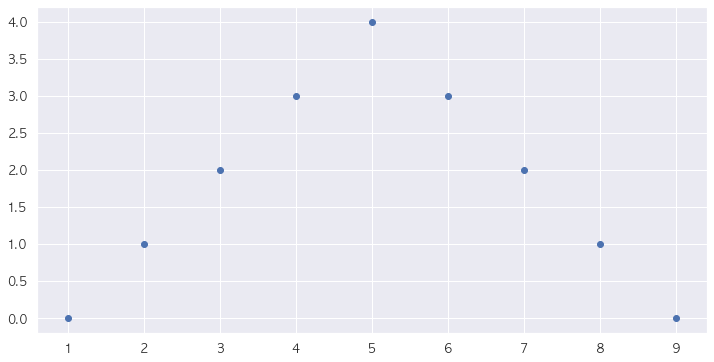

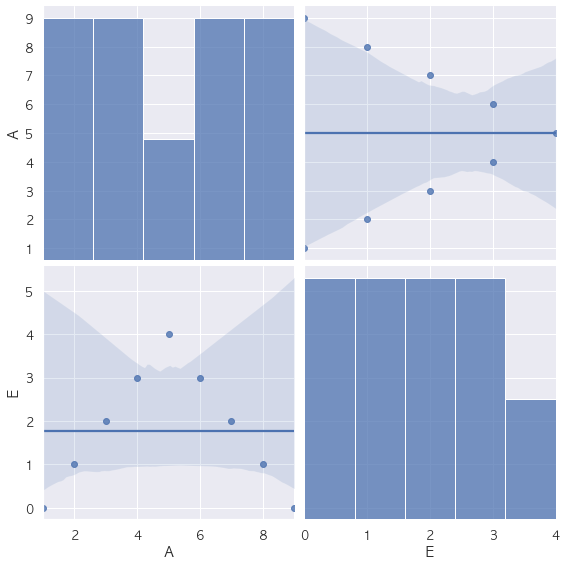

In [81]:
# 선형관계가 -2.90724631e-17인 A와 E
plt.scatter(A, E)

test_A_E = pd.DataFrame()
test_A_E['A'] = A
test_A_E['E'] = E

sn.pairplot(test_A_E,kind='reg', height=4)

## Spearman Correlation Coefficient (스피어만 상관계수)
- 비모수적 상관계수 : 모집단의 특정 분포를 가정하지 않고, 접근하는 방법이다. 비모수적 방법은 정규성 검정에서 정규분포를 따르지 않거나 표본의 개수가 10개 미만일 때 사용한다.
- 피어슨 상관계수와 같은 원리로 결과값을 산출하지만, 데이터의 순서통계량 값을 활용하여 순서값이 적용된 피어슨 상관계수를 사용한다.

In [88]:
stats.spearmanr(A, B)

SpearmanrResult(correlation=1.0, pvalue=0.0)

## kendall's tau (켄달의 상관계수)
- 켄달의 상관계수는 두 변수간에 방향을 분석하여 산출하는 방법이다. 즉, 한 변수가 증가할 때 다른 변수도 증가하는 횟수와 감소하는 회수를 전체 측정하여, 그 차이를 분석하여 상관계수로 표현하는 방법이다.
- concordant pair : 각 변수의 비교 대상이 상하 관계가 같으면 concordant pair라고 말한다.
- 공식
    - C : concordant pair의 수
    - D : concordant pair가 아닌 수

$$
\frac{C-D}{C+D}
$$

In [59]:
h_ex1 = np.arange(0, 5, 1)
w_ex1 = np.arange(0, 10, 2)

print(h_ex1)
print(w_ex1)

tau, p_value = stats.kendalltau(h_ex1, w_ex1)
print(tau)

[0 1 2 3 4]
[0 2 4 6 8]
0.9999999999999999


In [67]:
h_ex2 = np.arange(0, 5, 1)
w_ex2 = np.floor(np.random.rand(5) * 5)

print(h_ex2)
print(w_ex2)

tau, p_value = stats.kendalltau(h_ex2, w_ex2)
print(tau)

[0 1 2 3 4]
[4. 1. 4. 4. 3.]
-0.11952286093343936


#### 결론 : 추천시스템에서 보통 두 개의 상관계수 측정하는데에 사용된다. 이 때, 추천 행렬 안에서 어떠한 벡터가 어떠한 벡터랑 서로 연관이 있는지를 확인하며, 코사인 유사도와 유사하게 동작한다.